# DEPENDENCIES

In [ ]:
!nvidia-smi

Sat Apr 23 17:23:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu112

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu112


In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu112/torch1.11.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu112/torch1.11.0/index.html
     |████████████████████████████████| 530 kB 5.0 MB/s 
     |████████████████████████████████| 190 kB 45.8 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.5.0-cp37-cp37m-linux_x86_64.whl size=34903797 sha256=6ee50d0076c8324d4fbae73f31abad44e309485e33fbec5e674433f828a3e1d3
  Stored in directory: /root/.cache/pip/wheels/6d/82/be/108d51e80c12b8689123579e3ffcfa80731b3bc59675500b84
Successfully built mmcv-full


In [ ]:
!pip install mmdet

     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [ ]:
!git clone https://github.com/open-mmlab/mmtracking.git

Cloning into 'mmtracking'...
remote: Enumerating objects: 4253, done.
remote: Counting objects: 100% (1056/1056), done.
remote: Compressing objects: 100% (325/325), done.
remote: Total 4253 (delta 815), reused 783 (delta 730), pack-reused 3197
Receiving objects: 100% (4253/4253), 1.74 MiB | 13.08 MiB/s, done.
Resolving deltas: 100% (2554/2554), done.


In [ ]:
%cd mmtracking

/content/mmtracking


In [ ]:
!pip install -r requirements/build.txt
!pip install -v -e . 

In [ ]:
!pip install git+https://github.com/JonathonLuiten/TrackEval.git

  Cloning https://github.com/JonathonLuiten/TrackEval.git to /tmp/pip-req-build-fq7hyewr
  Running command git clone -q https://github.com/JonathonLuiten/TrackEval.git /tmp/pip-req-build-fq7hyewr
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for trackeval: filename=trackeval-1.0.dev1-py3-none-any.whl size=121499 sha256=4e027612f616d1ea1b160485585d503ce5be175e839d580edd2de39a59e56be3
  Stored in directory: /tmp/pip-ephem-wheel-cache-v28brj7j/wheels/f3/ca/38/409a5a8b4faf77d7e99a90462e20a4723c5b0f20fa12364aa7
Successfully built trackeval


In [ ]:
from mmcv import Config

# DATA

In [ ]:
!wget https://motchallenge.net/data/MOT20.zip
!unzip -q ./MOT20.zip
!python ./tools/convert_datasets/mot/mot2coco.py -i ./MOT20/ -o ./MOT20/annotations --split-train --convert-det

--2022-04-23 17:57:36--  https://motchallenge.net/data/MOT20.zip
Resolving motchallenge.net (motchallenge.net)... 131.159.19.34, 2a09:80c0:18::1034
Connecting to motchallenge.net (motchallenge.net)|131.159.19.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5028926248 (4.7G) [application/zip]
Saving to: ‘MOT20.zip’

MOT20.zip           100%[===================>]   4.68G  17.7MB/s    in 4m 5s   

2022-04-23 18:01:42 (19.6 MB/s) - ‘MOT20.zip’ saved [5028926248/5028926248]

Converting train set to COCO format
100% 4/4 [00:14<00:00,  3.71s/it]
train has 2215 instances.
Done! Saved as ./MOT20/annotations/train_cocoformat.json and ./MOT20/annotations/train_detections.pkl
Converting test set to COCO format
100% 4/4 [00:02<00:00,  1.73it/s]
test has 0 instances.
Done! Saved as ./MOT20/annotations/test_cocoformat.json and ./MOT20/annotations/test_detections.pkl
Converting half-train set to COCO format
100% 4/4 [00:40<00:00, 10.04s/it]
half-train has 1241 instances.
D

# METRICS

## MOTP, MOTA


Let $M_0$ = {}. For every time frame t:   
1. For every mapping $(o_i, h_j)$ in $M_{t−1}$, verify if it is still valid. If object $o_i$ is still visible and tracker hypothesis $h_j$ still exists at time t, and if their distance does not exceed the threshold T, make the correspondence between $o_i$ and $h_j$ for frame t.  
  
2. For all objects for which no correspondence was made yet, try to find a matching hypothesis. Allow only one to one matches. Start by matching the pair with the minimal distance and then go on until the threshold
T is exceeded or there are no more pairs to match. If a correspondence $(o_i, h_k)$ is made that contradicts a mapping $(o_i, h_j)$ in $M_{t−1}$, replace $(o_i, h_j)$ with $(o_i, h_k)$ in $M_t$. Count this as a mismatch error and let $mme_t$ be the number of **mismatch errors** for frame **t**.  
  
3. After the first two steps, a set of matching pairs for the current time frame is known. Let $c_t$ be the number of matches found for time **t**. For each of theses matches, calculate the distance **d** it between the object $o_i$ and its corresponding hypothesis.  
  
4. All remaining hypotheses are considered **false positives**. Similarly, all remaining objects are considered **misses**. Let $fp_t$ and $m_t$ be the number of **false positives** and **misses** respectively for frame **t**. Let also $g_t$ be the number of objects present at time **t**.  
  
5. Repeat the procedure from step 1 for the next time frame. Note that since for the initial frame, the set of mappings M0 is empty, all correspondences made are initial and no mismatch errors occur.

**The Multiple Object Tracking Precision (MOTP)**

$$MOTP = \frac{\sum_{i,t}d_{i,t}}{\sum_t c_t}$$

**The Multiple Object Tracking Accuracy (MOTA)**

$$MOTA = 1 - \frac{\sum_t(m_t + fp_t + mme_t)}{\sum_tg_t} $$

## HOTA

HOTA can be thought of as a combination of three IoU scores. It divides the task of evaluating tracking into three subtasks: **detection, association and localization**, and calculates a score for each using an IoU (intersection over union) formulation. It then combines these three IoU scores for each subtask into the final HOTA score.

### Localization Accuracy (LocA)

Localization measures the spatial alignment between one predicted detection and one ground-truth detection.  
It is calculated as the ratio of the overlap (intersection) between the two detections and the total area covered by both of them (union).  
This can be seen in the diagram below.

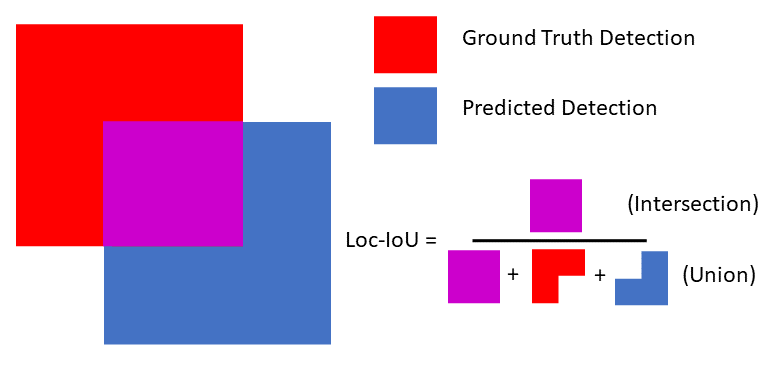

We can measure the overall **Localization Accuracy (LocA)** by averaging the **Loc-IoU** over all pairs of matching predicted and ground-truth detections in the whole dataset.  
$$LocA = \frac{1}{|TP|}\sum_{c \in TP} Loc-IoU(c)$$

### Detection Accuracy (DetA)

Detection measures the alignment between the set of all predicted detections and the set of all ground-truth detections. Here we need to define which detections between the set of predicted and ground-truth detections are intersecting. To do this, we define a localization threshold (e.g. Loc-IoU > 0.5) above which we say that two detections intersect.

Matching pairs of detections are called True Positives (TP), and can be thought of as the intersection between the two sets of detections. Predicted detections that don’t match are False Positives (FP) and ground-truth detections that don’t match are False Negatives (FN). The detection IoU is then given by:

$$DetA = \frac{|TP|}{|TP| + |FP| + |FN|}$$

We can see that this has fundamentally the same structure as Loc-IoU. It is the intersecting area (the matches or TPs) divided by the total area (the union over all detections). Whereas Loc-IoU measures the alignment between a single predicted and ground-truth detection, the Det-IoU now measures the alignment between the set of all predicted detections and the set of all ground-truth detections.

### Association Accuracy

Association measures how well a tracker links detections over time into the same identities (IDs), given the ground-truth set of identity links in the ground-truth tracks. We can measure this by taking a predicted detection and ground-truth detection that are matched together (using the Hungarian matching as explained above), and measuring the alignment between this predicted detection’s whole track and the ground-truth detection’s whole track.

The intersection between two tracks can be measured as the number of True Positive matches between the two tracks, we call these True Positive Associations (TPA). Any remaining detections in the predicted track (which are either matched to other ground-truth tracks or none at all) are False Positive Associations (FPA) and any remaining detections in the ground-truth track False Negative Associations (FNA). The Association IoU (Ass-IoU) can then be calculated in a similar way as seen previously:

$$AssA = \frac{|TPA|}{|TPA| + |FPA| + |FNA|}$$

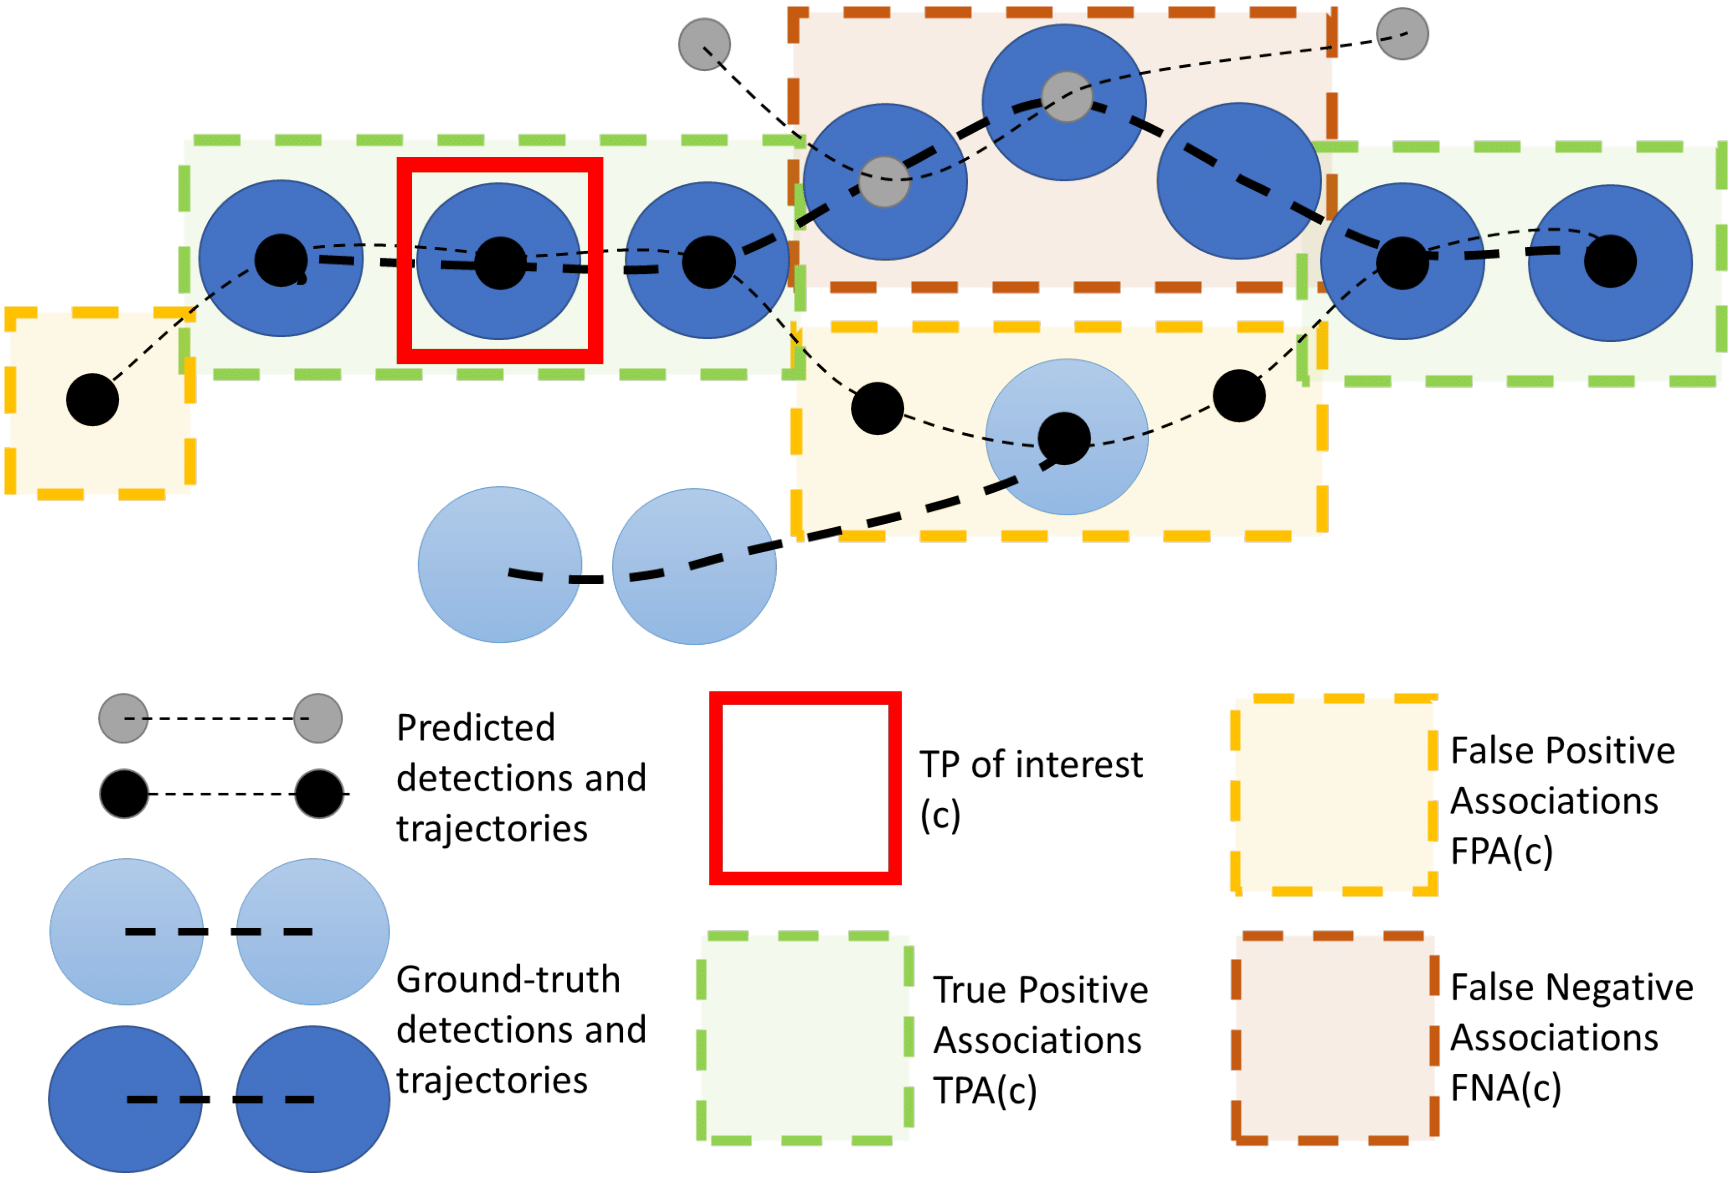

### HOTA

Naturally, all three components (localization, detection and association) are important for tracking success, so it’s important to measure all of them. However, we often want a single metric which we can use for ranking how well trackers perform overall. This metric is HOTA, which is a combination of all three IoU scores defined above:

$$ HOTA_α = \sqrt{DetA_α + AssA_α}$$  
$$ HOTA = \frac{1}{19}\sum^{0.95}_{\alpha+=0.05}HOTA_\alpha$$

Note that earlier, both the DetA and AssA were defined using a Hungarian matching based on a certain Loc-IoU threshold (α). Since the DetA and AssA score both depend on the Loc-IoU values, we calculate these score over a range of different α thresholds. For each threshold value, we calculate the final score as the geometric mean of the detection score and the association score. By then integrating over the different α thresholds, we include the localization accuracy into the final score.

## MT, PT, ML

MT - Number of objects tracked for at least 80 percent of lifespan.  
PT - Number of objects tracked between 20 and 80 percent of lifespan.  
ML - Number of objects tracked less than 20 percent of lifespan.

## Comparison

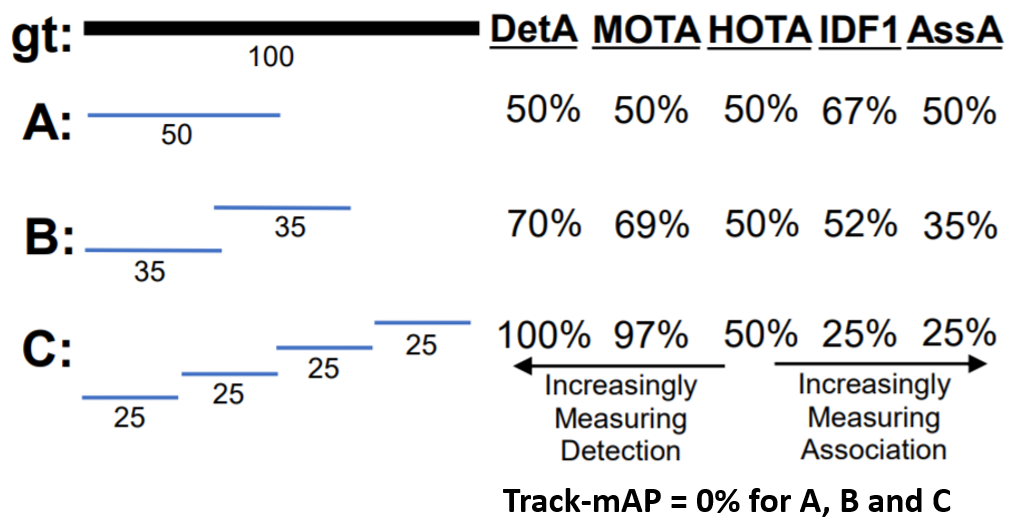

In this example, we have single ground-truth object, which is present in all frames of a 100 frame video. We then have three different trackers (A, B and C) with increasing detection accuracy and decreasing association accuracy. In this example, every predicted detection is a TP (e.g. matches with the ground-truth).

Which tracker is better out of A, B and C? This is not a well-defined question, because each tracker is very different, some are better at detection, others at associations, so it depends which of these are more important for your application. Since often both detection and association are very important, HOTA is designed to equally weight each of them in calculating an overall score. This can be seen in the above example. The detection score (DetA) increases, while the association score (AssA) decreases, such that for all three the combined HOTA score remains the same.

In comparison it can be seen that the MOTA score is heavily biased towards measuring detection at the expense of ignoring association. In contrast the IDF1 score is heavily biased towards measuring association, at the expense of ignoring detection. 

# MODELS

In [ ]:
!mkdir -p /content/checkpoints/tractor/
!mkdir -p /content/checkpoints/sort/
!mkdir -p /content/checkpoints/deepsort/
!mkdir -p /content/configs/
!mkdir -p /content/results/tractor/
!mkdir -p /content/results/sort/
!mkdir -p /content/results/deepsort/

## SORT

In [ ]:
# load tracktor detector and reid checkpoints
!wget -c https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth \
      -O /content/checkpoints/sort/detector_sort.pth

# Setup a checkpoint file to load
checkpoint_detector = '/content/checkpoints/sort/detector_sort.pth'

--2022-04-22 15:52:58--  https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165672927 (158M) [application/octet-stream]
Saving to: ‘/content/checkpoints/sort/detector_sort.pth’

/content/checkpoint 100%[===================>] 158.00M  8.60MB/s    in 24s     

2022-04-22 15:53:24 (6.50 MB/s) - ‘/content/checkpoints/sort/detector_sort.pth’ saved [165672927/165672927]



In [ ]:
# Choose to use a config and initialize the tractor
config = "./configs/mot/deepsort/sort_faster-rcnn_fpn_4e_mot17-private-half.py"

cfg = Config.fromfile(config)

cfg.data_root = "/content/mmtracking/MOT20"

cfg.data.train.ann_file = "/content/mmtracking/MOT20/annotations/half-train_cocoformat.json"
cfg.data.train.img_prefix = "/content/mmtracking/MOT20/train/"
cfg.data.test.detection_file = "/content/mmtracking/MOT20/annotations/half-train_detections.pkl"

cfg.data.val.ann_file = "/content/mmtracking/MOT20/annotations/half-val_cocoformat.json"
cfg.data.val.img_prefix = "/content/mmtracking/MOT20/train"
cfg.data.test.detection_file = "/content/mmtracking/MOT20/annotations/half-val_detections.pkl"

cfg.data.test.ann_file = "/content/mmtracking/MOT20/annotations/half-val_cocoformat.json"
cfg.data.test.img_prefix = "/content/mmtracking/MOT20/train/"
cfg.data.test.detection_file = "/content/mmtracking/MOT20/annotations/half-val_detections.pkl"

cfg.model.detector.init_cfg.checkpoint = checkpoint_detector

fname = "/content/configs/sort.py"
cfg.dump(fname)

In [ ]:
!python tools/test.py "/content/configs/sort.py" --eval track

/content/mmtracking/mmtrack/core/utils/misc.py:25: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmtracking/mmtrack/core/utils/misc.py:35: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=4.50s)
creating index...
index created!
2022-04-22 15:53:50,260 - mmtrack - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/checkpoints/sort/detector_sort.pth'}
2022-04-22 15:53:50,260 - mmcv - INFO - load model from: /content/checkp

## DeepSORT

In [ ]:
# load tracktor detector and reid checkpoints

!wget -c https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth \
      -O /content/checkpoints/deepsort/detector_deepsort.pth

!wget -c https://download.openmmlab.com/mmtracking/mot/reid/tracktor_reid_r50_iter25245-a452f51f.pth \
      -O /content/checkpoints/deepsort/reid_deepsort.pth

--2022-04-22 16:26:05--  https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165672927 (158M) [application/octet-stream]
Saving to: ‘/content/checkpoints/deepsort/detector_deepsort.pth’

/content/checkpoint 100%[===================>] 158.00M  8.40MB/s    in 19s     

2022-04-22 16:26:25 (8.35 MB/s) - ‘/content/checkpoints/deepsort/detector_deepsort.pth’ saved [165672927/165672927]

--2022-04-22 16:26:26--  https://download.openmmlab.com/mmtracking/mot/reid/tracktor_reid_r50_iter25245-a452f51f.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

In [ ]:
# Choose to use a config and initialize the tractor
config = "./configs/mot/deepsort/deepsort_faster-rcnn_fpn_4e_mot17-private-half.py"

# Setup a checkpoint file to load
checkpoint_detector = '/content/checkpoints/deepsort/detector_deepsort.pth'
checkpoint_reid = "/content/checkpoints/deepsort/reid_deepsort.pth"

In [ ]:
cfg = Config.fromfile(config)

cfg.data_root = "/content/mmtracking/MOT20"

cfg.data.train.ann_file = "/content/mmtracking/MOT20/annotations/half-train_cocoformat.json"
cfg.data.train.img_prefix = "/content/mmtracking/MOT20/train/"
cfg.data.test.detection_file = "/content/mmtracking/MOT20/annotations/half-train_detections.pkl"

cfg.data.val.ann_file = "/content/mmtracking/MOT20/annotations/half-val_cocoformat.json"
cfg.data.val.img_prefix = "/content/mmtracking/MOT20/train"
cfg.data.test.detection_file = "/content/mmtracking/MOT20/annotations/half-val_detections.pkl"

cfg.data.test.ann_file = "/content/mmtracking/MOT20/annotations/half-val_cocoformat.json"
cfg.data.test.img_prefix = "/content/mmtracking/MOT20/train/"
cfg.data.test.detection_file = "/content/mmtracking/MOT20/annotations/half-val_detections.pkl"

cfg.model.detector.init_cfg.checkpoint = checkpoint_detector
cfg.model.reid.init_cfg.checkpoint = checkpoint_reid

fname = "/content/configs/deep_sort.py"
cfg.dump(fname)

In [ ]:
!python tools/test.py "/content/configs/deep_sort.py" --eval track

/content/mmtracking/mmtrack/core/utils/misc.py:25: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmtracking/mmtrack/core/utils/misc.py:35: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=4.20s)
creating index...
index created!
2022-04-22 16:27:12,598 - mmtrack - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/checkpoints/deepsort/detector_deepsort.pth'}
2022-04-22 16:27:12,598 - mmcv - INFO - load model from: /conten

## Tractor

In [ ]:
# load tracktor detector and reid checkpoints
!wget -c https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_8e_mot20_20210804_162232-7fde5e8d.pth \
      -O /content/checkpoints/tractor/detector.pth

!wget -c https://download.openmmlab.com/mmtracking/mot/reid/reid_r50_6e_mot20_20210803_212426-c83b1c01.pth \
      -O /content/checkpoints/tractor/reid.pth

--2022-04-23 18:05:15--  https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_8e_mot20_20210804_162232-7fde5e8d.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165673007 (158M) [application/octet-stream]
Saving to: ‘/content/checkpoints/tractor/detector.pth’

/content/checkpoint 100%[===================>] 158.00M  8.57MB/s    in 22s     

2022-04-23 18:05:38 (7.26 MB/s) - ‘/content/checkpoints/tractor/detector.pth’ saved [165673007/165673007]

--2022-04-23 18:05:38--  https://download.openmmlab.com/mmtracking/mot/reid/reid_r50_6e_mot20_20210803_212426-c83b1c01.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10

In [ ]:
# Choose to use a config and initialize the tractor
config = "./configs/mot/tracktor/tracktor_faster-rcnn_r50_fpn_8e_mot20-public.py"

# Setup a checkpoint file to load
checkpoint_detector = '/content/checkpoints/tractor/detector.pth'
checkpoint_reid = "/content/checkpoints/tractor/reid.pth"

In [ ]:
# print(f'Config:\n{cfg.pretty_text}')

In [ ]:
cfg = Config.fromfile(config)

cfg.data_root = "/content/mmtracking/MOT20"

cfg.data.train.ann_file = "/content/mmtracking/MOT20/annotations/half-train_cocoformat.json"
cfg.data.train.img_prefix = "/content/mmtracking/MOT20/train/"
cfg.data.train.detection_file = "/content/mmtracking/MOT20/annotations/half-train_detections.pkl"

cfg.data.val.ann_file = "/content/mmtracking/MOT20/annotations/half-val_cocoformat.json"
cfg.data.val.img_prefix = "/content/mmtracking/MOT20/train"
cfg.data.val.detection_file = "/content/mmtracking/MOT20/annotations/half-val_detections.pkl"

cfg.data.test.ann_file = "/content/mmtracking/MOT20/annotations/half-val_cocoformat.json"
cfg.data.test.img_prefix = "/content/mmtracking/MOT20/train/"
cfg.data.test.detection_file = "/content/mmtracking/MOT20/annotations/half-val_detections.pkl"

cfg.model.detector.init_cfg.checkpoint = checkpoint_detector
cfg.model.reid.init_cfg.checkpoint = checkpoint_reid

fname = "/content/configs/tracktor.py"
cfg.dump(fname)

In [ ]:
!python tools/test.py "/content/configs/tracktor.py" --eval track

/content/mmtracking/mmtrack/core/utils/misc.py:25: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmtracking/mmtrack/core/utils/misc.py:35: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=3.83s)
creating index...
index created!
2022-04-23 18:06:05,673 - mmtrack - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/checkpoints/tractor/detector.pth'}
2022-04-23 18:06:05,673 - mmcv - INFO - load model from: /content/checkpoi

# Comparison

| Model    | HOTA  | MOTA  | MOTP  | MT   | PT   | ML    | IDP  | IDR  | IDF1 |
| ----     | ----  | ----  | ----  | ---- | ---- | ----  | ---- | ---- | ---- |
| SORT     | 22.7  | 40    | 28.5  | 10.5 | 61.1 | 28.3  | 38.8 | 20.2 | 26.5 |
| DeepSORT | 27.6  | 41.7  | 28.5  | 10.6 | 60.6 | 28.7  | 53.4 | 27.8 | 36.6 |
| Tractor  | 58.8  | 76.4  | 15.6  | 48.9 | 38.6 | 12.5  | 80.8 | 62.1 | 70.2 |